In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline

%matplotlib inline

In [34]:
df=pd.read_csv("./3-customersatisfaction.csv")

df.head()
df.columns

Index(['Unnamed: 0', 'Customer Satisfaction', 'Incentive'], dtype='object')

In [35]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


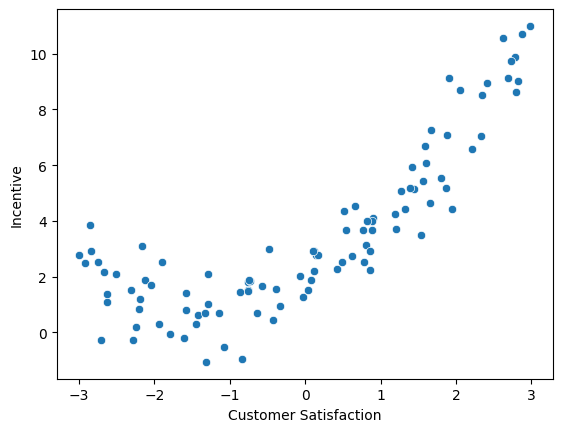

In [37]:
sns.scatterplot(x="Customer Satisfaction",y="Incentive",data=df)
plt.xlabel="Customer Satisfaction"
plt.ylabel="Incentive"
plt.show()

In [38]:
#dependent * independent features

X=df[["Customer Satisfaction"]]
y=df["Incentive"]

y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [40]:
#scaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Regression

regression=LinearRegression()
regression.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
y_predict=regression.predict(X_test)

In [42]:
y_predict

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [43]:
score=r2_score(y_test,y_predict)
score  ## Pretty low score due to polynomial distribution of the data so we will change model

0.2705652535622246

In [ ]:
# Degree Selection for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
poly=PolynomialFeatures() # default degree=2 and default include_bias=True

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
X_train_poly


array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [45]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred=regression.predict(X_test_poly)

In [47]:
score=r2_score(y_test,y_pred)
print(score)

0.7685687698788557


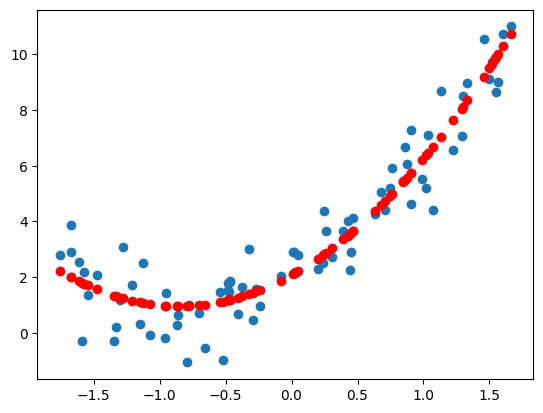

In [48]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [49]:
### Try with dgree 3

poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [50]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred=regression.predict(X_test_poly)

In [52]:
r2_score=r2_score(y_test,y_pred)
r2_score

0.7573443621401051

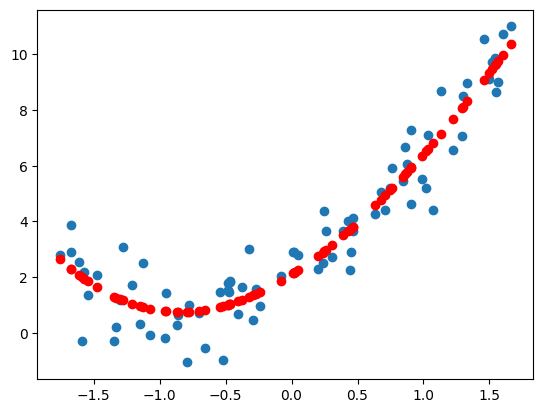

In [53]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [74]:
### NEW DATASET SUBMISSION

new_df=pd.read_csv("./3-newdatas.csv")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [55]:
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [60]:
new_df.rename(columns={"0":"Customer Satisfaction"},inplace=True)
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [62]:
X_new=new_df[["Customer Satisfaction"]]

In [65]:
X_new=scaler.fit_transform(X_new)
X_new_poly=poly.transform(X_new)

y_new=regression.predict(X_new_poly)

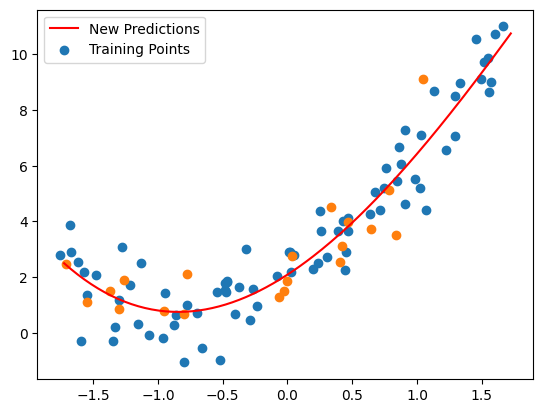

In [70]:
plt.plot(X_new,y_new,"r",label="New Predictions")
plt.scatter(X_train,y_train,label="Training Points")
plt.scatter(X_test,y_test)
plt.legend()
plt.show()

In [85]:
### Creating PIPELINE


def poly_regression(degree):
    poly_features=PolynomialFeatures(degree=degree)
    lin_reg=LinearRegression()
    scaler=StandardScaler()
    pipeline=Pipeline([
        ("sdantart_scaler",scaler),
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
        
    ])
    pipeline.fit(X_train,y_train)
    score=pipeline.score(X_test,y_test)
    print("R2 Score: ",score)


In [86]:
poly_regression(1)

R2 Score:  0.2705652535622246


In [ ]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree) ### increasing the degree will increase the risk of Overfitting

R2 Score:  0.2705652535622246
R2 Score:  0.7685687698788558
R2 Score:  0.7573443621401048
R2 Score:  0.7355034443260413
R2 Score:  0.7351244165095402
R2 Score:  0.734359048213343
R2 Score:  0.7347819263549451
R2 Score:  0.7411422099998375
R2 Score:  0.7310763879815918
R2 Score:  0.728057862123283
